In [10]:
# KI-Gilde
# QAware GmbH, Munich
# 14.01.2022

## Entropy and Cross Entropy

This tutorial has two purposes:

* It recaps the ideas of entropy and cross entropy.
* It explains how they are implemented in Pytorch.

Pytorch is often elegant and fast but not always straightforward. Our aim is to disentangle important functions
such as
[`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
[`BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) (binary cross entropy loss)
[`BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html)
[`NLLLoss`](https://pytorch.org/docs/stable/generated/torch.nn.NLLLLoss.html) (non-negative log loss)
[`softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html#torch.nn.Softmax)
[`log_softmax`](https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html#torch.nn.LogSoftmax)
[`sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html?highlight=sigmoid#torch.nn.Sigmoid) and
[`logit`](https://pytorch.org/docs/stable/special.html#torch.special.logit).
We explain for each of these:

* input (format and meaning),
* output (format and meaning),
* what they exactly do,
* and what the names mean (`NLLLoss`?).

We are not interested in the plethora of optional parameters.
The story is trivial for the initiated but possibly helpful for the rest of us.

In [11]:
import torch
import torch.nn as nn
from torch import arange, tensor, softmax, log_softmax, Tensor
import matplotlib.pyplot as plt

def show_diff(a: Tensor, b: Tensor):
    print(a.item() - b.item())

def plot(x, y, label, xlabel, ylabel):
    plt.plot(x, y, label=label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


### Entropy (Recap)

Consider a lottery with one number out of a million winning, all outcomes being equally likely.
The information that, say, the number $n=123.456$ is __not__ going to win is unsurprising while the converse,
$n$ is guaranteed to win, would be of utmost interest. The lower the probability of an event,
the higher the surprise. The surprise of an event is defined as the negative $\log$ of its probability: the smaller the probability, the higher the surprise.
The surprise can also be thought of as the amount of information conveyed,
it is in fact the number of bits needed to encode that information.

[abc]:  http://google.com/

The entropy $H$ of a discrete probability distribution $\textbf{p} = [p_1, \dots, p_n]$ is defined as the expected surprise or
the expected amount of information:

$H(\textbf{p}) = E[\log(\textbf{p})] = -\sum_{i=0}^{n-1} p_i \log(p_i)$

where it is understood that all probabilities are positive (just discard the zeros).
The simplest case is the Bernoulli distribution $B(p)$ which describes the throw of a coin:

$P[X=1]=p$, $P[X=0]=1-p$.

We have

$H(p) = -[p\log(p) + (1-p)\log(1-p)]$

The entropy's derivative

$\frac{d}{dp} H(p) = \log(p) - \log(1-p)$

is zero at $p = 0.5$. The maximal entropy $log(2) \approx 0.6931$  is located at $p = 0.5$, with
minimum $0$ as $p$ approaches $0$ or $1$. This is a general principle: many equally likely events
increase the entropy, few outstanding events decrease it: entropy measures disorder or lack of structure.
For the discrete case, it analogously holds that

$0 \lt H(\textbf{p}) \le \log(n)$

with the maximum $\log(n)$ at $\textbf{p} = [\frac{1}{n}, \dots, \frac{1}{n}]$ and the minimum $0$ at
probabilities concentrated in one spot (a so called one-hot probability).

The entropy $H$ of a continuous probability density $f$ is defined as:

$H(f) = \int_{\operatorname{supp} (f)} f(t)\log(f(t))dt$,

The entropy of the uniform distribution on $[0, T]$ is simply $\log(T)$.
Note that in the continuous case, the entropy can be $0$ (for $T = 1$) or negative
(for $T \in (0, 1)$).
The entropy of the normal distribution $\mathcal{N}(\mu, \sigma)$ is $\frac {1}{2}(1+\log(2\sigma ^{2}\pi))$,
independent of $\mu$.

### Entropy (Pytorch)

Pytorch feature numerous distributions; they all come with their entropy function.

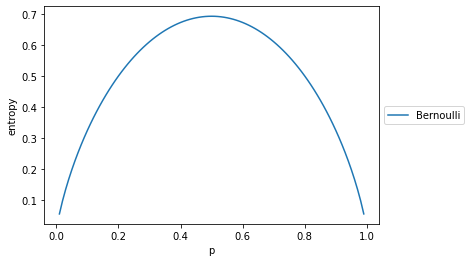

In [12]:
from torch.distributions.bernoulli import Bernoulli

x = arange(0.01, 1, 0.01)
y = tensor([Bernoulli(p).entropy() for p in x])
plot(x, y, 'Bernoulli' , 'p', 'entropy')

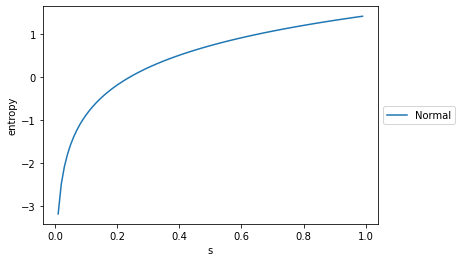

In [13]:
from torch.distributions.normal import Normal

x = arange(0.01, 1, 0.01)
y = tensor([Normal(tensor([0.]), tensor([s])).entropy() for s in x])
plot(x, y, 'Normal' , 's', 'entropy')

### Some useful functions

We introduce $\operatorname{odds}$, $\operatorname{logit}$ and $\operatorname{softmax}$.

"The odds are 5" is a way of saying that winning is 5 times more likely than losing,
which means that $p/(1 - p) = 5$, or $p = 5/6$. The definition is:

$\operatorname{odds}(p) = \frac{p}{1-p}$.

$\operatorname{logit}$ is the $\log$ of odds:

$\operatorname{logit}(p) = \log(\frac{p}{1-p})$,

and $\operatorname{sigmoid}$ is the inverse of $\operatorname{logit}$:

$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}$,

which is thus confirmed:

In [14]:
x = tensor(2.)
p = tensor(0.1)

# logit undoes sigmoid
show_diff(torch.logit(torch.sigmoid(x)), x)

# sigmoid undoes logit
show_diff(torch.sigmoid(torch.logit(p)), p)

-4.76837158203125e-07
0.0


$\operatorname{sigmoid}$ normalizes any real number to the open interval $(0, 1)$.
It is frequently used as activation function in neuronal networks.

$\operatorname{softmax}$ does for vectors what $\operatorname{sigmoid}$ does for scalars. It normalizes any
vector $\textbf{x} = [x_1, \dots, x_n]$ of real numbers (e.g. the output
of a neuronal network) to a probability distribution:

$\operatorname{softmax}(\textbf{x}) = \left[ \frac{\exp(x_i)}{\sum_{j=1}^{n}exp(x_j)} \right]_{i=1,\dots, n}$

$\operatorname{softmax}$ is often combined with $\log$ for better numerical stability.
$\operatorname{softmax}$ is only one of many possible normalizations. So, for instance, it would be natural to
normalize $[\operatorname{logit}(p), \operatorname{logit}(1-p)]$ to $[p, 1-p]$, but here is
what $\operatorname{softmax}$ does:

$\operatorname{softmax}([\operatorname{logit}(p), \operatorname{logit}(1-p)]) =
\left[\frac{p^2}{p^2+(1-p)^2}, \frac{(1-p)^2}{p^2+(1-p)^2}\right]$,


### Cross Entropy (Recap)

The cross entropy of two discrete probability distributions $\textbf{p}$ and $\textbf{q}$ is defined as

$H(\textbf{p}, \textbf{q}) = -E_p [\log(\textbf{q})] = -\sum_{i=1}^{n-1} p_i \log(q_i)$

The cross entropy tells us how much
information is contained in $\textbf{q}$ given $\textbf{p}$.
It can be thought of as the gap between $\textbf{p}$ and $\textbf{q}$:
the more additional information $\textbf{q}$ carries, the larger the gap. In more precise terms:

> $H(p, q)$ is the expected extra message-length per datum that must be communicated if a code
that is optimal for a given (wrong) distribution $q$ is used, compared to using a code based
on the true distribution $p$: it is the excess entropy
(see [Wikipedia](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence#Motivation) for details).

It is not symmetric, and we have $H(\textbf{p}, \textbf{p}) = H(\textbf{p})$ which is never zero in the discrete case.

The business case of cross entropy is as follows:
A known distribution $\textbf{p}$ (the one before the $\log$) is considered the truth or best guess.
A second distribution $\textbf{q}$ (the one inside the $\log$)
is assumed to be Bernoulli, Normal or whatever. The problem is to minimize
the gap $H(\textbf{p}, \textbf{q})$ between $\textbf{p}$ and $\textbf{q}$ by
choosing optimal parameters of the assumed distribution.
In neuronal networks, cross entropy is used exactly as any other distance
such as the mean square error (MSE).

### Cross Entropy (Pytorch)

There are two Pytorch functions which do the job: `CrossEntropyLoss` and `BCELoss`
(binary cross entropy loss) for the binary case.

Let us look at `CrossEntropyLoss` first. Up to some details, it
takes two arrays of distributions (two matrices with shape `(m, K)`)
and computes the mean cross entropy of all pairs.
To understand the details, we proceed in three steps:

1. We define a function `CELoss1(Q: Tensor, P: Tensor) -> Tensor` which accepts two matrices `Q` and `P`,
each row being a probability distribution. The result is the mean of cross entropies `H(Q(i), P(i))`
(a tensor with one float element).
Note that the order of arguments has changed with respect to $H(p, q)$:
now the reference distribution `P` comes last.
The shape of both `P` and `Q` is `(m, K)`:
`m` is the number of observations (or batch size),
`K` the number of different classes; in the Bernoulli case, we have `K = 2`.

2. We define a function `CELoss2(Q: Tensor, y: Tensor) -> Tensor`, in which the second argument `P` is
replaced with a one-hot representation: all but one `p[i]` are zero, and exactly one, say `p[k]` equals one,
which is expressed by `y[i] = k`. So, the vector `y` replaces a huge spare matrix with exactly one non-zero
element in each row (this is called the incidence matrix).

3. We define a function `CELoss3(X: Tensor, y: Tensor) -> Tensor` which differs from `cross_entropy_onehot`
in that each row of the first argument `X` is transformed into a probability distribution via `softmax`.
So, `CELoss3` accepts any K-dimensional input. Up to some additional parameters does
this function the same as Pytorch's `CELoss`.

In [15]:
def CELoss1(Q: Tensor, P: Tensor) -> Tensor:
    """
    @param Q: matrix of estimated probability densities to be compared to P, shape = (m, K)
    @param P: matrix of reference probability densities, shape = (m, K)
    @return: -mean of row wise cross entropy of Q with respect to P
    """
    # log(Q) has shape (m, K); log is elementwise applied
    # log(Q) * P has shape (m, K); this is the elementwise product
    # torch.sum(torch.log(Q) * P, 1) yields the vector of row sums
    return -torch.mean(torch.sum(torch.log(Q) * P, 1))

def CELoss2(Q: Tensor, y: Tensor) -> Tensor:
    """
    @param Q: matrix of estimated probability densities to be compared to y, shape = (m, K)
    @param y: vector of true labels; 0 <= y[i] < K = Q.shape[1], shape = (m,)
    y represents a one-hot probability
    @return: mean of row wise cross entropy of Q with respect to p
    """
    x = range(Q.shape[0]) # m
    # Q[x, y] is the same as [Q[i, y[i]] for i in range(m)]
    return -torch.mean(torch.log(Q[x, y]))

def CELoss3(X: Tensor, y: Tensor) -> Tensor:
    """
    @param X: any vector of shape (n,)
    X is transformed into a probability density Q via softmax
    @param y: the true label; 0 <= y < K = q.shape
    y represents the one-hot probability
    @return: cross entropy of q with respect to y
    """
    return CELoss2(softmax(X, 1), y)

CELoss = nn.CrossEntropyLoss()

# CELoss and CELoss3 yield almost the same results.

X = tensor([[1., 1., 2., 3.],
            [3., 4., 1., 7.]])
y = tensor([3, 3])

show_diff(CELoss(X[[1]], y[[1]]), CELoss3(X[[1]], y[[1]]))
show_diff(CELoss(X, y), CELoss3(X, y))

-2.9802322387695312e-08
-2.9802322387695312e-08


### A Numerical Issue

In `CELoss3` we first compute `softmax` with lots of exponents and then take the `log` in `CELoss2`.
It is convenient to shift the `log` from `CELoss2` to `CELoss3`.
So, `CELoss2` becomes `NLLLoss1`, equivalent to `NLLLoss`, and
`CELoss3` becomes `CELoss4`, equivalent to `CrossEntropyLoss`.
`NLLLoss` is so called because it expects its input to be just that, a non-negative log loss.

In [16]:
def NLLLoss1(Q: Tensor, y: Tensor) -> Tensor:
    """
    Negative Loss Likelihood Loss
    @param Q: matrix of estimated probability densities to be compared to y, shape = (m, K)
    @param y: the true label; 0 <= y < K = q.shape
    @return: -mean of [Q[i, y[i]] for i in range(m)]
    """
    x = range(Q.shape[0]) # m
    # Q[x, y] is the same as [Q[i, y[i]] for i in range(m)]
    return -torch.mean(Q[x, y])

def CELoss4(X: Tensor, y: Tensor) -> Tensor:
    """
    This is identical to CELoss3 but numerically more stable
    @param X: any vector of shape (n,)
    X is transformed into a probability density Q via softmax
    @param y: the true label; 0 <= y < K = q.shape
    This represents the one-hot probability p concentrated at y
    @return: cross entropy of q with respect to y
    """
    return NLLLoss1(log_softmax(X, 1), y)


# CELoss and CELoss4 yield exactly the same results

X = tensor([[1., 1., 2., 3.],
            [3., 4., 1., 7.]])
y = tensor([3, 3])

show_diff(CELoss(X[[1]], y[[1]]), CELoss4(X[[1]], y[[1]]))
show_diff(CELoss(X, y), CELoss4(X, y))


0.0
0.0


### Cross Entropy Loss and Binary Cross Entropy (Pytorch)

As the rows of `P`, the first argument of `CELoss`, sum up to 1, we could dispose of one column.
This is what `BCELoss` does in the binary case. It serves as a shorthand for `CrossEntropyLoss`.
Its input are two tensors of shape `(m,)`, the first one, `P`, with probabilities,
the second one, `y` with binary labels. The missing second column of `P` is computed as `1 - P`.
See `BCELoss1` for an implementation.

`BCELoss` is not quite consistent with `CrossEntropyLoss`.
Comparing `BCELoss` with `CELoss`is tricky because the latter applies
`softmax` while the former uses `sigmoid`. We proceed as follows:

The input to `CELoss` is some tensor `X` and binary labels `y` both with shape `(m, 2)`.
The input to `BCELoss` is obtained by taking the second column of `softmax(X)`.
`BCELoss` requires the binary labels to be `float`.

In [17]:
def BCELoss1(q: Tensor, y: Tensor) -> Tensor:
    ones = torch.ones_like(y)
    return -torch.mean(y * torch.log(q) + (ones - y) * torch.log(ones - q))

CELoss = nn.CrossEntropyLoss()
BCELoss = nn.BCELoss()

# Input for CELoss:
# X.shape = (m, 2), because it's binary
X = tensor([[8., 2.], [3., 4.], [8., 3.]])
# y contains only 0 and 1
y = tensor([0, 1, 0])

# Input for BCELoss (and BCELoss1):
# softmax(X, dim=1) contains in each row a binary probability density
# Q is the second column of softmax(X, dim=1)
Q = softmax(X, dim=1)[:, 1]
y1 = y.to(torch.float)  # doesn't make sense

# CELoss and BCELoss are almost equal,
show_diff(CELoss(X, y), BCELoss(Q, y1))

# while BCELoss and BCELoss1 completely agree.
show_diff(BCELoss(Q, y1), BCELoss1(Q, y))

-7.450580596923828e-09
0.0


### BCELoss and BCEWithLogitsLoss (Pytorch)

`BCELoss` comes in two varieties: The first one, `BCELoss` accepts as first
argument a vector `P` of probabilities.
This corresponds to `CELoss1`. The second one, `BCEWithLogitsLoss`, accepts as first argument any real vector
which is normalized by `sigmoid` rather than `softmax` as in `CrossEntropyLoss`.
`BCEWithLogitsLoss` is so called because the first argument is expected to be a logit.

In [18]:
BCEWithLogitsLoss = nn.BCEWithLogitsLoss()
logit = torch.logit

Q = tensor([0.1, 0.3, 0.6])
y = tensor([1., 0., 1.])

show_diff(BCELoss(Q, y), BCEWithLogitsLoss(logit(Q), y))

0.0
